In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cosine

from ase import Atoms, geometry, neighborlist
from ase.io import read, write
from ase.neighborlist import NeighborList
from ase.visualize import view

from scipy import sparse

import networkx as nx

In [3]:
mols = read("planar_mols.xyz", ":")

In [4]:
NLIST_KWARGS = {
    "skin": 0.3,   # doesn't matter for this application.
    "sorted": False,
    "self_interaction": False,
    "bothways": True
}

In [5]:
f1 = mols[0]
nl = neighborlist.build_neighbor_list(f1, **NLIST_KWARGS)

In [6]:
view(f1, viewer="ngl")

In [7]:
def build_graph(mol: Atoms, nl=None):
    if nl == None:
        nl = mol.build_neighbor_list(mol)
    G = nx.Graph()
    for i in range(len(mol)):
        atom = mol[i]
        nb_indices, offsets = nl.get_neighbors(i)
        nb_atoms = [mol[a] for a in nb_indices]
        el = [(i, nb) for nb in nb_indices]
        G.add_edges_from(el)
        G.nodes[i]["atom"] = mol[i]
    return G

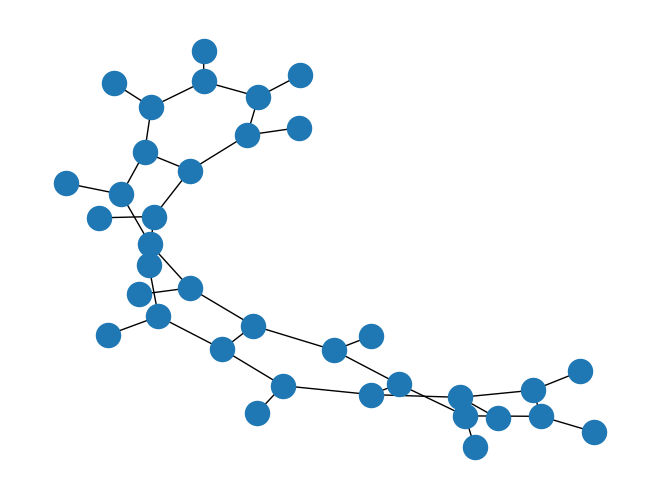

In [8]:
G = build_graph(f1, nl)
nx.draw(G)

In [9]:
rings = nx.cycle_basis(G)
rings

[[7, 3, 2, 6, 9, 11],
 [12, 8, 7, 11, 15, 17],
 [18, 14, 12, 17, 21, 23],
 [24, 20, 18, 23, 27, 28],
 [29, 26, 24, 28, 32, 33]]

In [10]:
ring_atoms = Atoms([G.nodes[i]["atom"] for i in rings[0]])
view(ring_atoms, viewer="ngl")

In [11]:
dist_vecs, _ = geometry.get_distances(ring_atoms.positions)
pos_vecs = ring_atoms.positions[0] + dist_vecs[0]
pos_vecs

array([[22.16435097, 23.06374446, 27.12292023],
       [21.36496788, 22.39716756, 28.1086141 ],
       [21.24210692, 22.90385249, 29.3774692 ],
       [21.91302342, 24.11562743, 29.74586128],
       [22.68207126, 24.79204221, 28.83292597],
       [22.83729103, 24.30340632, 27.49444151]])

In [12]:
com = pos_vecs.mean(axis=0)
com

array([22.03396858, 23.59597341, 28.44703872])

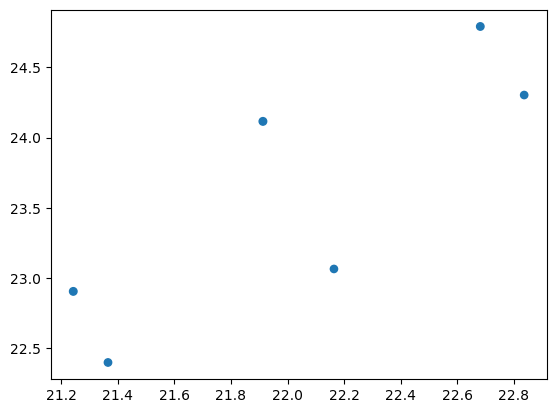

In [13]:
plt.scatter(pos_vecs[:, 0], pos_vecs[:, 1], pos_vecs[:, 2])

In [14]:
def plot_pos_vecs(pos_vecs):  
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(pos_vecs[:, 0], pos_vecs[:, 1], pos_vecs[:, 2])
    com = pos_vecs.mean(axis=0)
    ax.scatter(*com)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    return fig, ax

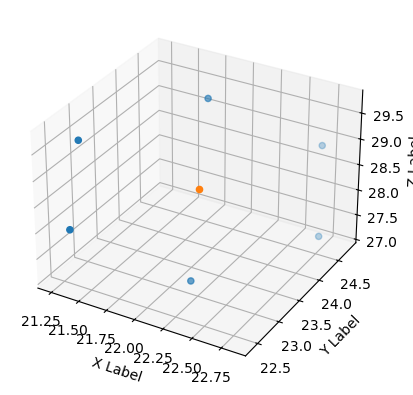

In [15]:
fig, ax = plot_pos_vecs(pos_vecs)
plt.show()

[2.25246286] [2.22871019] [0.00588264]


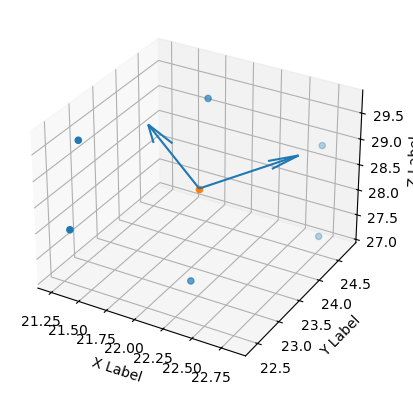

In [47]:
def plot_points_and_moments(atoms):
    dist_vecs, _ = geometry.get_distances(atoms.positions)
    pos_vecs = atoms.positions[0] + dist_vecs[0]
    com = pos_vecs.mean(axis=0)
    moments, axes = atoms.get_moments_of_inertia(vectors=True)
    mass = np.sum([atom.mass for atom in ring_atoms])
    E = np.reshape(moments, (3,1))
    coefs = np.array([[0, 1, 1],
                      [1, 0, 1],
                      [1, 1, 0]]) * mass / 5
    a, b, c = np.sqrt(np.linalg.solve(coefs, E))
    print(a, b, c)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(pos_vecs[:, 0], pos_vecs[:, 1], pos_vecs[:, 2])
    ax.scatter(*com)
    ax.quiver(*com, *axes[0], length=a[0]/2)
    ax.quiver(*com, *axes[1], length=b[0]/2)
    ax.quiver(*com, *axes[2], length=c[0]/2)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    return fig, ax

fig, ax = plot_points_and_moments(ring_atoms)
plt.show()

In [28]:
# IP = PD
moments, axes = ring_atoms.get_moments_of_inertia(vectors=True)
print(f"moments:\n{moments}\n\naxes:\n{axes}")

moments:
[ 71.59301227  73.12715094 144.71916567]

axes:
[[ 0.46608076  0.84736254  0.25445129]
 [-0.37740693 -0.06970268  0.92342057]
 [-0.80020793  0.52642024 -0.28731341]]


In [41]:
mass = np.sum([atom.mass for atom in ring_atoms])
E = np.reshape(moments, (3,1))
coefs = np.array([[0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 0]]) * mass / 5
a, b, c = np.sqrt(np.linalg.solve(coefs, E))
print(a, b, c)
print(a**2, b**2, c**2)

[2.25246286] [2.22871019] [0.00588264]
[5.07358894] [4.96714911] [3.46054491e-05]


In [44]:
print(1, 2, 3)

1 2 3
